# GRIP @The Sparks Foundation
# Data Science and Business Analytics- JULY 2022
# Task 2: Prediction using Unsupervised ML
## Simple Linear Regression
## Objective : Predict the optimum number of cluster on iris dataset.
### Author: Suvham Kumar Patro

# 1. Import necessary Libraries

In [262]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

# 2. EDA(Exploratory Data Analysis)

# a. Understand the data

In [263]:
# Loading the "iris" dataset
df = pd.read_csv(r"C:\Users\kumar\Downloads\Iris.csv")

In [264]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [265]:
# import first & last 5 rows
display(df.head())
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [266]:
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", df.shape)

iris data shape (Rows, Columns): (150, 6)


iris data shape (Rows, Columns): (150, 6)

In [267]:
# check dataframe structure like columns and its counts, datatypes & Null Values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [268]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [269]:
df.dtypes.value_counts()

float64    4
int64      1
object     1
dtype: int64

In [270]:
# Gives number of data points in each variable
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [271]:
# descriptive statistics
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [272]:
print('Iris-setosa')
setosa = df['Species'] == 'Iris-setosa'
print(df[setosa].describe())

print('\nIris-versicolor')
versicolor = df['Species'] == 'Iris-versicolor'
print(df[versicolor].describe())

print('\nIris-virginica')
virginica = df['Species'] == 'Iris-virginica'
print(df[virginica].describe())

Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min  

# i) SepalLengthCm

In [273]:
df['SepalLengthCm'].nunique()

35

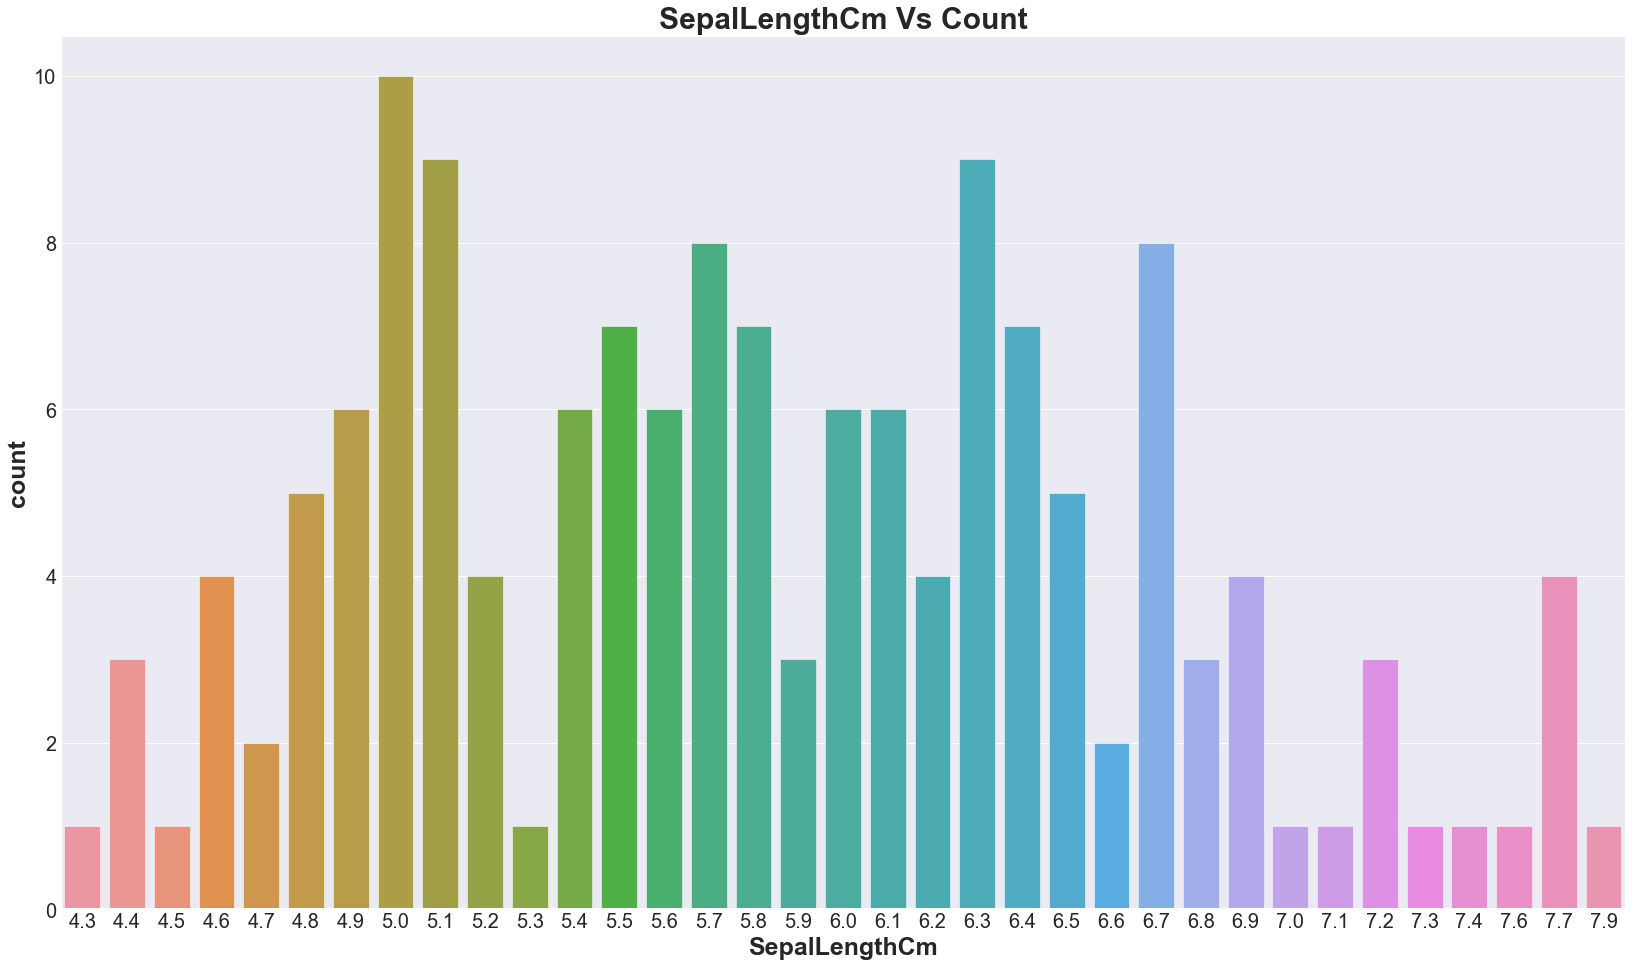

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64


In [274]:
plt.figure(figsize=(25,15))

sns.countplot(df['SepalLengthCm'])

plt.xlabel('SepalLengthCm', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('SepalLengthCm Vs Count', fontsize=30, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print(df['SepalLengthCm'].value_counts())

# ii) SepalWidthCm

In [275]:
df['SepalWidthCm'].nunique()

23

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64


<AxesSubplot:>

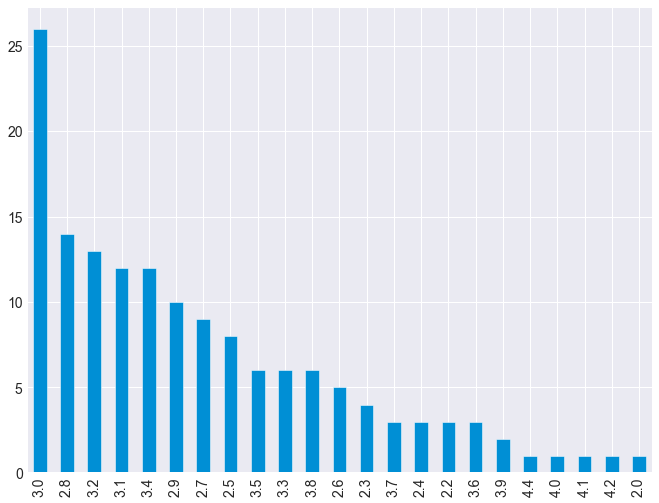

In [276]:
plt.figure(figsize=(10,8))
print(df['SepalWidthCm'].value_counts())
df['SepalWidthCm'].value_counts().plot.bar()

# iii) PetalLengthCm

In [277]:
df['PetalLengthCm'].nunique()

43

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64


<AxesSubplot:>

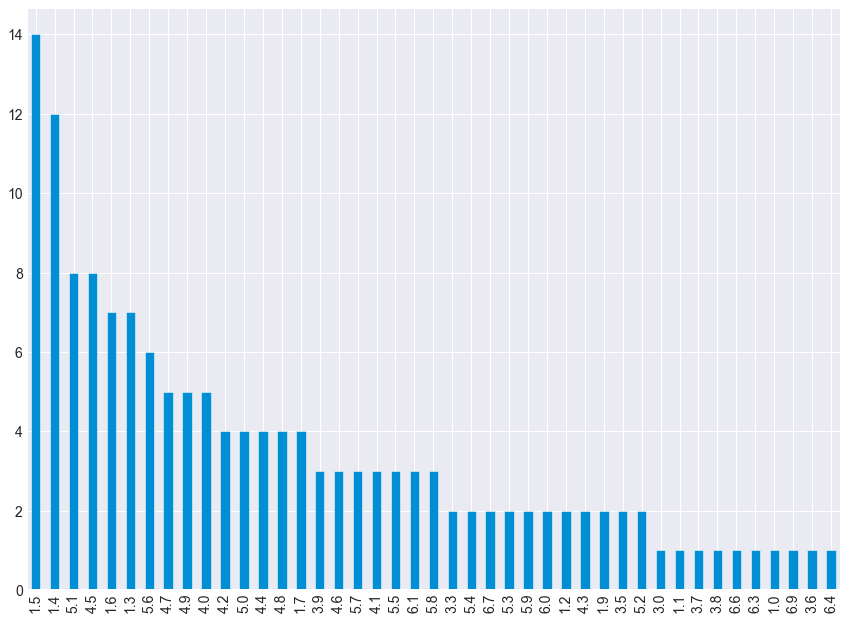

In [278]:
plt.figure(figsize=(13,10))
print(df['PetalLengthCm'].value_counts())
df['PetalLengthCm'].value_counts().plot.bar()

# iv) PetalWidthCm

In [279]:
df['PetalWidthCm'].nunique()


22

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64


<AxesSubplot:>

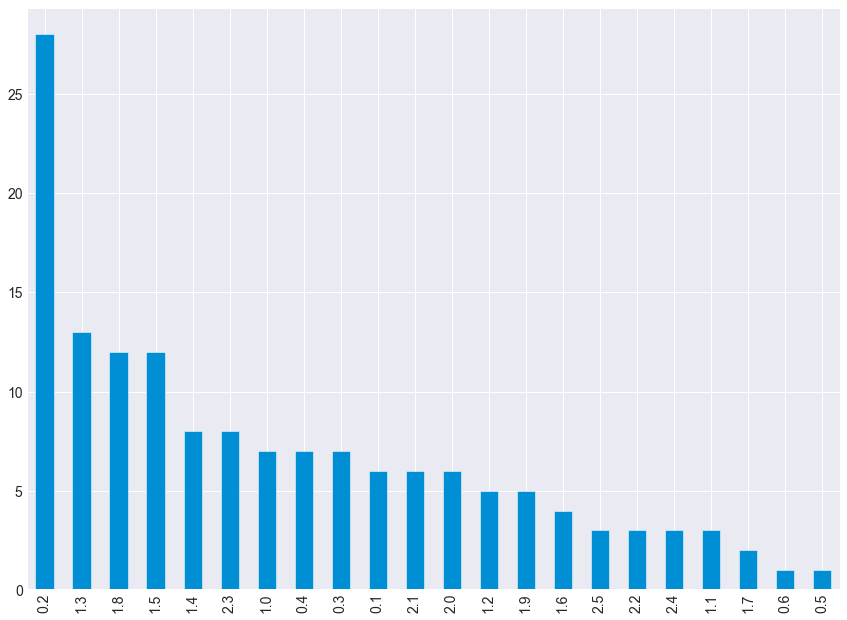

In [280]:
plt.figure(figsize=(13,10))
print(df['PetalWidthCm'].value_counts())
df['PetalWidthCm'].value_counts().plot.bar()

# v) Species

In [281]:
df['Species'].nunique()

3

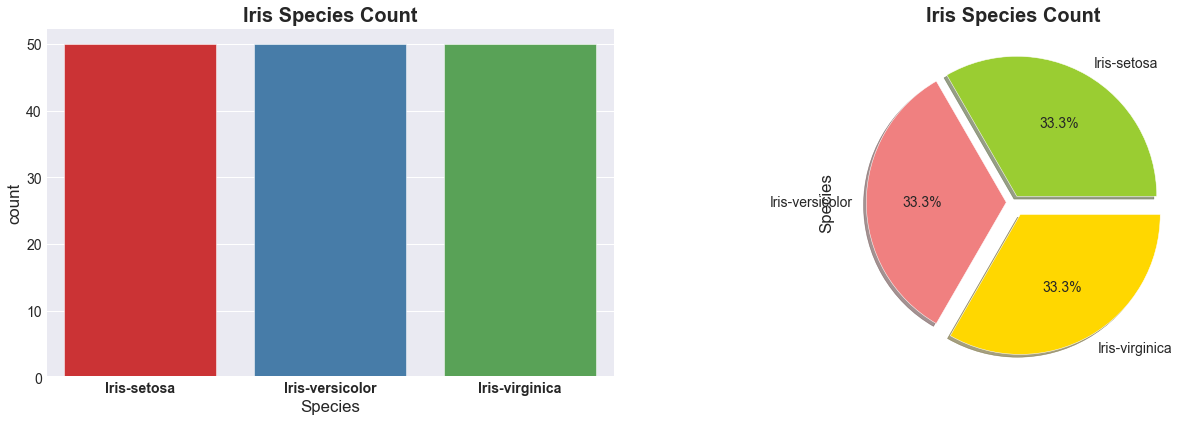

In [282]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot('Species',data=df, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.subplot(1,2,2)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.show()

# b. Clean the data

# i) Drop unwanted features

In [283]:
df.drop("Id", axis=1, inplace=True)

# ii) Missing Values

In [284]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

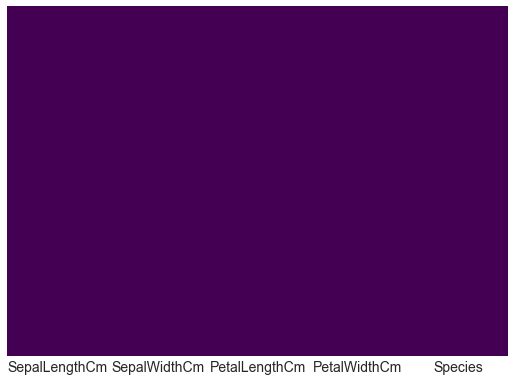

In [285]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# c. Find Outliers

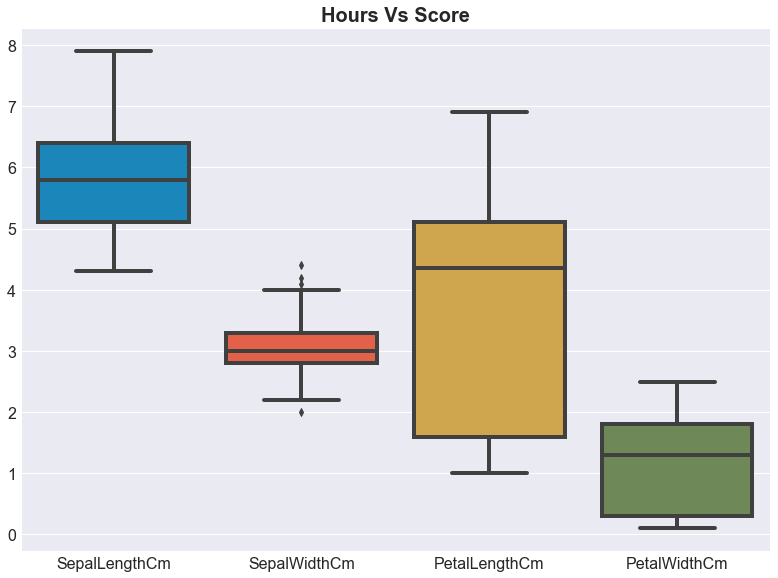

In [286]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df)

plt.title("Hours Vs Score", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# d. Skew and Kurtosis

In [287]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

Text(0.5, 1.0, 'Skew:0.3149109566369728')

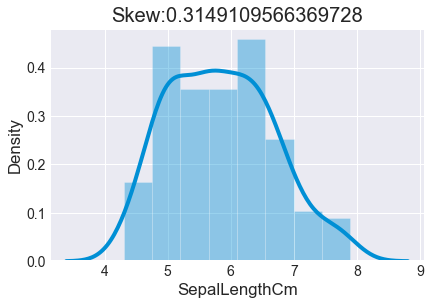

In [288]:
sns.distplot(df['SepalLengthCm'])
Skew_sepallength = df['SepalLengthCm'].skew()
plt.title("Skew:"+str(Skew_sepallength))

Text(0.5, 1.0, 'Skew:0.3340526621720866')

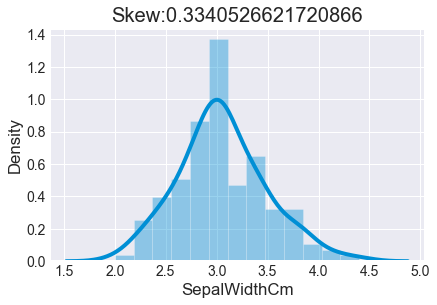

In [289]:
sns.distplot(df['SepalWidthCm'])
Skew_sepalwidth = df['SepalWidthCm'].skew()
plt.title("Skew:"+str(Skew_sepalwidth))

Text(0.5, 1.0, 'Skew:-0.27446425247378287')

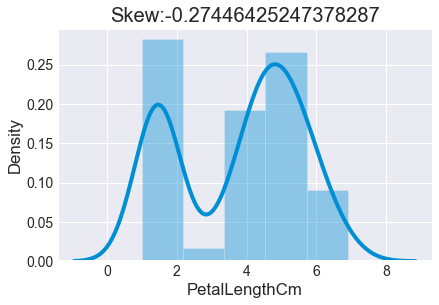

In [290]:
sns.distplot(df['PetalLengthCm'])
Skew_petallength = df['PetalLengthCm'].skew()
plt.title("Skew:"+str(Skew_petallength))

Text(0.5, 1.0, 'Skew:-0.10499656214412734')

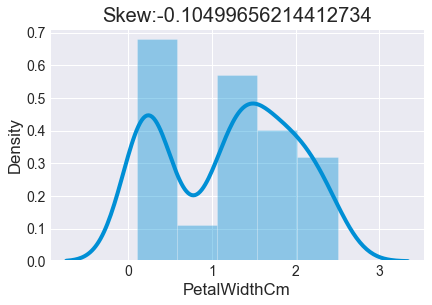

In [291]:
sns.distplot(df['PetalWidthCm'])
Skew_petalwidth = df['PetalWidthCm'].skew()
plt.title("Skew:"+str(Skew_petalwidth))

# e. Analysis of Relationship between variables

i) Correlation with the variable of interest

In [292]:
df.corr()['SepalLengthCm']

SepalLengthCm    1.000000
SepalWidthCm    -0.109369
PetalLengthCm    0.871754
PetalWidthCm     0.817954
Name: SepalLengthCm, dtype: float64

ii) Heatmap

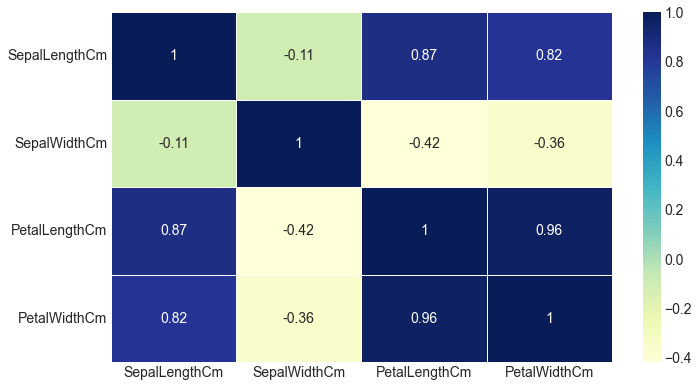

In [293]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

# d. Data Visualisation

i) Univariate Analysis

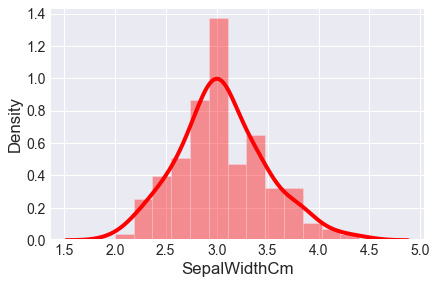

In [294]:
sns.distplot(df.SepalWidthCm, color = 'red')
plt.show()

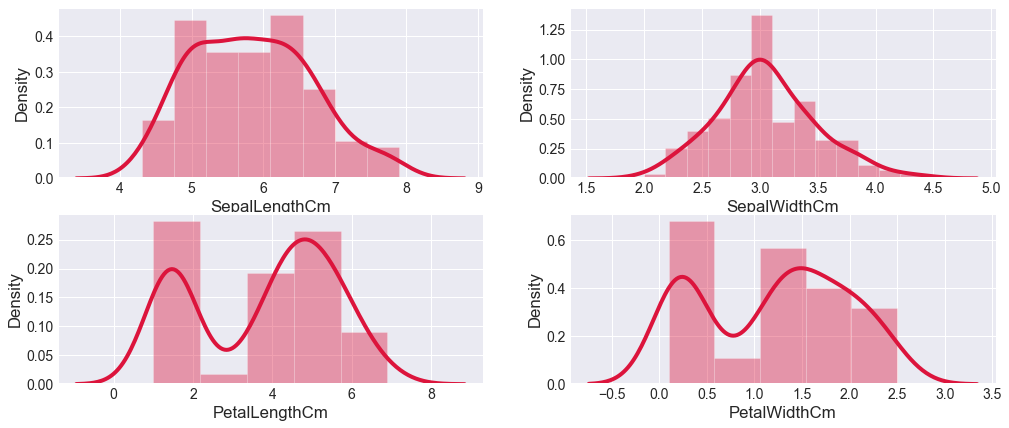

In [295]:
plt.figure(figsize = (15,10))
feature = df.columns[0:4]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')

We can see that Sepal Length and Sepal Width columns are normally distributed. And Petal Length and Petal Width columns have skewness in the data.

We will use Petal_length and petal_width for cluster profiling.

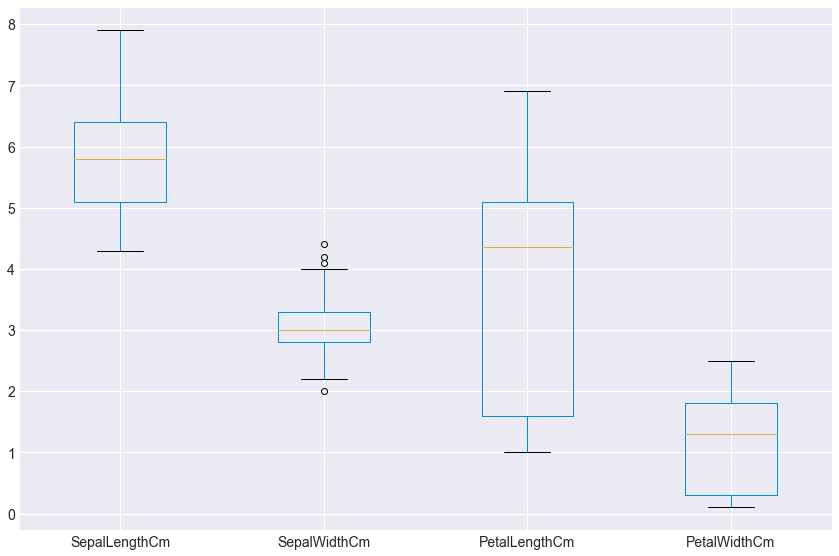

In [296]:
plt.figure(figsize = (13, 9)) 
df.boxplot()
plt.show()

ii) Bivariate Analysis

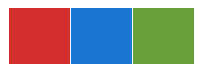

In [297]:
# Setting color palette
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

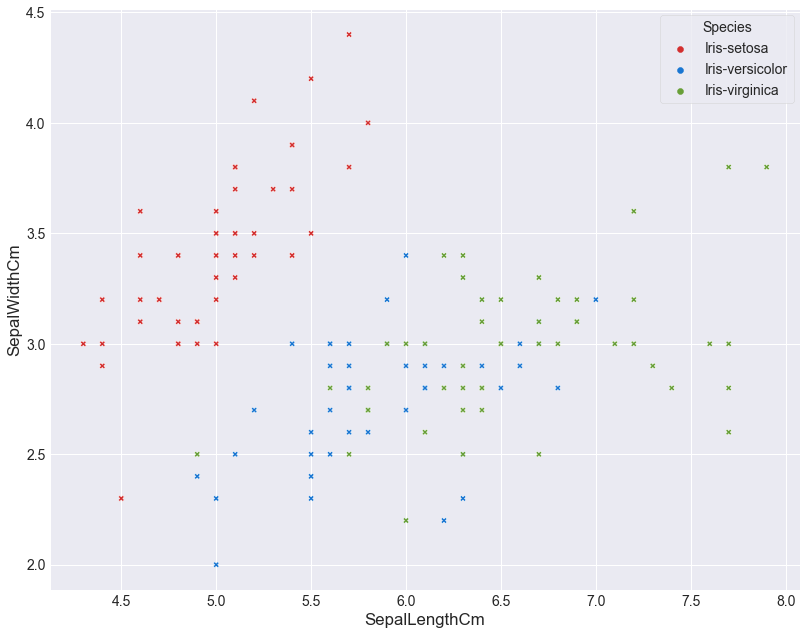

In [298]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, palette=colors, marker="X")
plt.show()

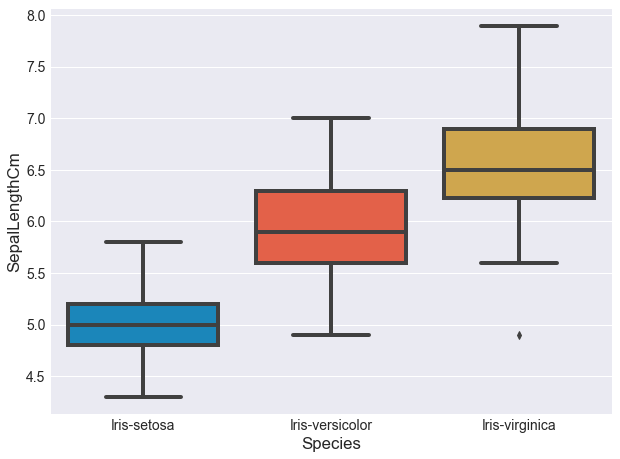

In [299]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df, x='Species', y='SepalLengthCm')
plt.show()

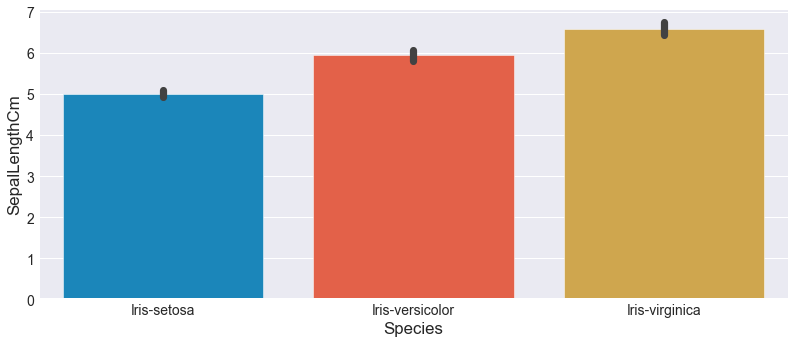

In [300]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()

from above figure setosa has the shorter sepal lenght and virginica has longer

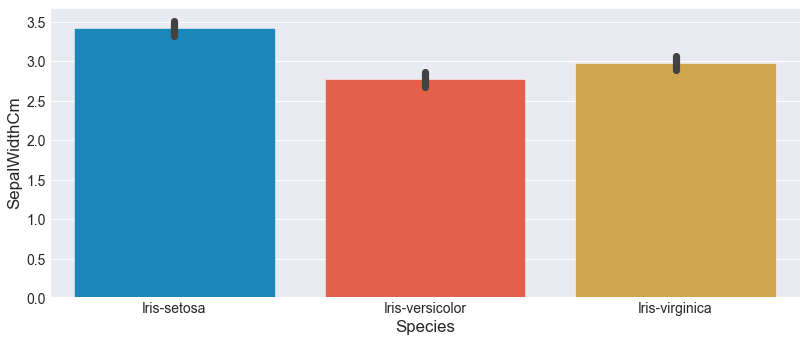

In [301]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalWidthCm'],data=df)
plt.show()

setosa has the longer Sepalwidth and Versicolor has shorter Sepalwidth

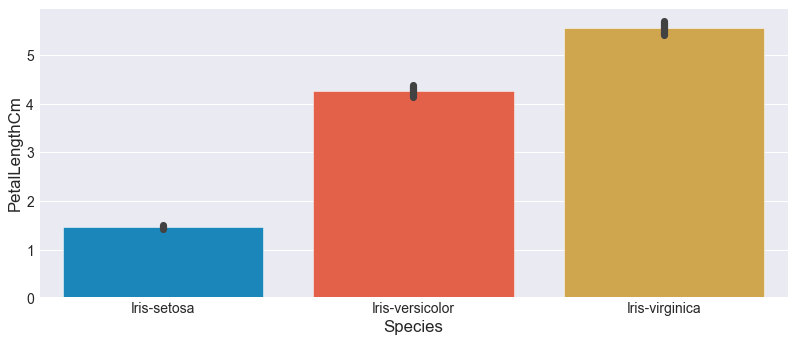

In [302]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalLengthCm'],data=df)
plt.show()

setosa has the shorter Petallength and Virginica has longer Petallength

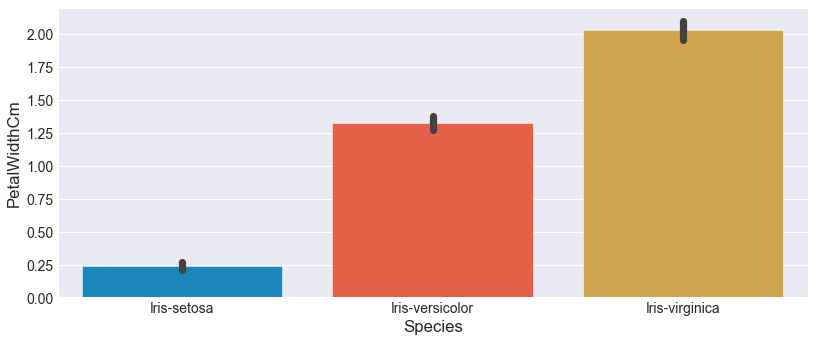

In [303]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalWidthCm'],data=df)
plt.show()

setosa has the shorter Petalwidth and Virginica has longer Petalwidth


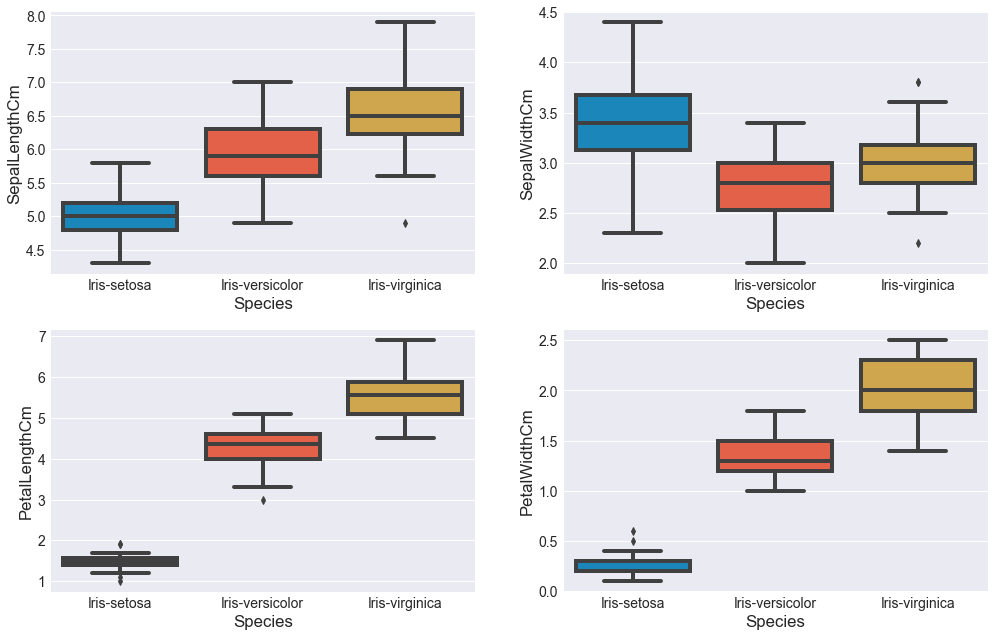

In [304]:
# Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species', y='SepalLengthCm', data=df)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species', y='SepalWidthCm', data=df)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species', y='PetalLengthCm', data=df)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

iii) Multivariate Analysis

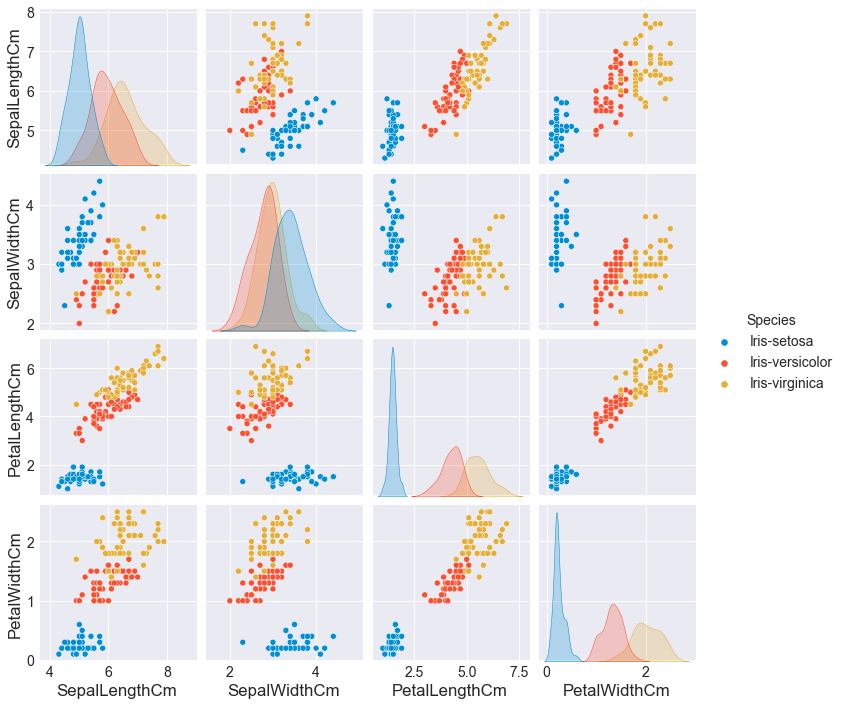

In [305]:
# Pairplot
sns.pairplot(df, hue='Species')
plt.show()


After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.

There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

# 3. Model building and Evaluation

In [306]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [307]:
# independent variable
x=df.drop(['Species'],axis=1)

# dependent variable
y=df['Species']

In [308]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [309]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# 1. KNN

In [310]:
from sklearn.cluster import KMeans
features  = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

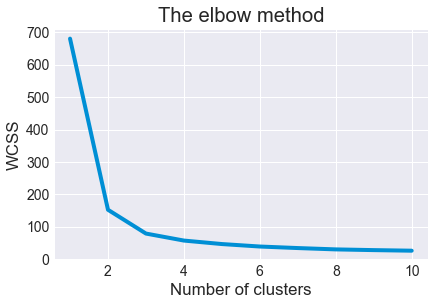

In [311]:
# Plotting the elbow graph

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [312]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

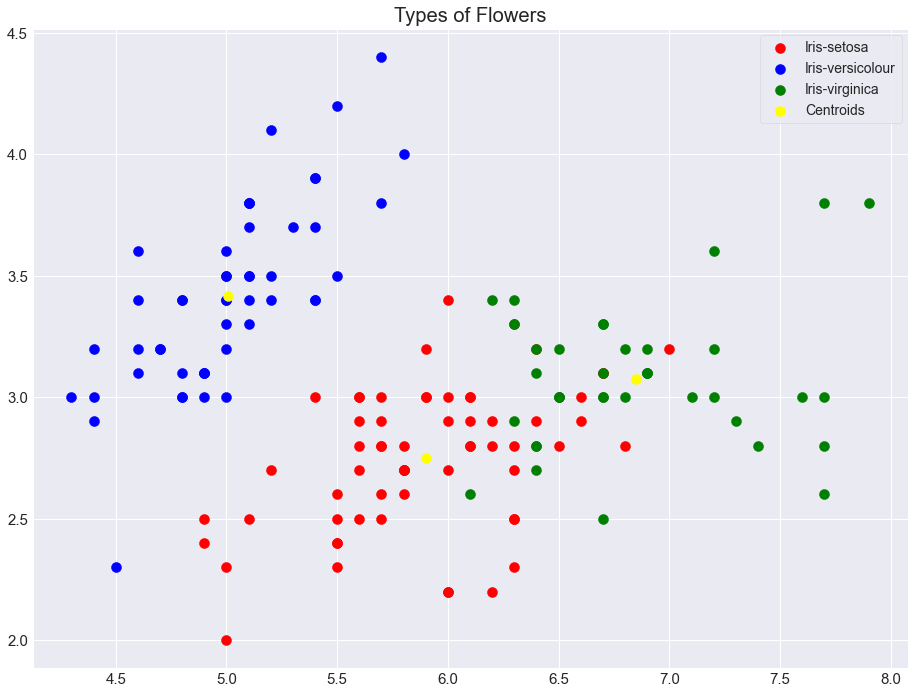

In [313]:
# Visualising the clusters
plt.figure(figsize=(14,11))
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Types of Flowers')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

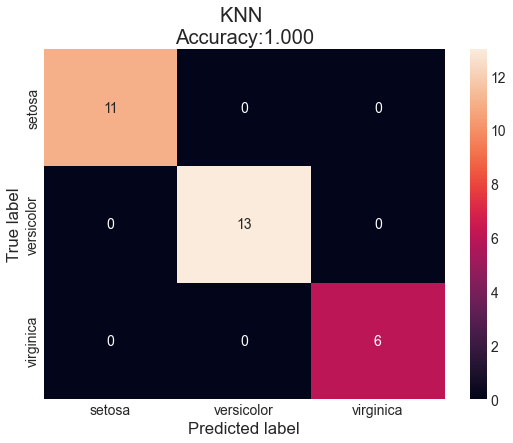

In [314]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, preds)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [315]:
print(accuracy_score(y_test, preds))    
print(confusion_matrix(y_test, preds))    
print(classification_report(y_test, preds)) 

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 2. SVM

In [316]:
from sklearn import svm
svn = svm.SVC()    
svn.fit(x_train, y_train)    
predictions = svn.predict(x_test)    
print(accuracy_score(y_test, predictions))    
print(confusion_matrix(y_test, predictions))    
print(classification_report(y_test, predictions)) 

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



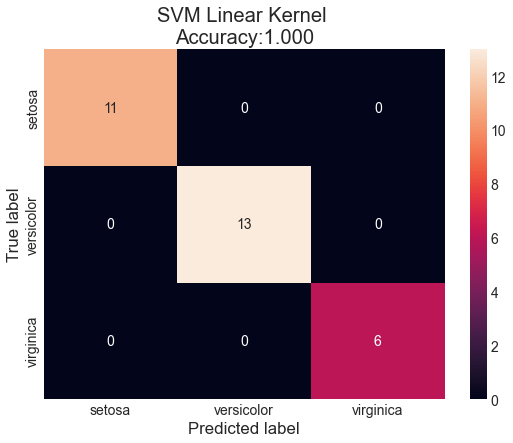

In [317]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 3. Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Test Accuracy for Scikit-Learn model:', accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 100.0 %


In [319]:
print(accuracy_score(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



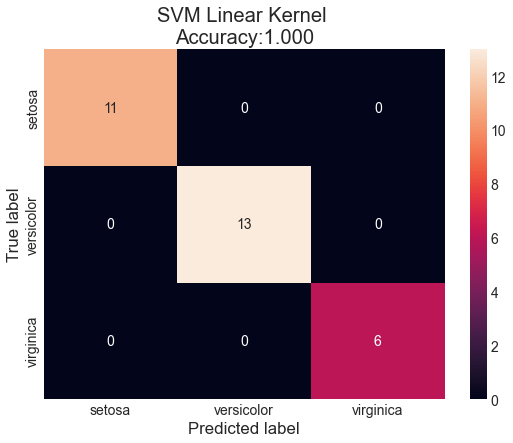

In [320]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 4. Random Forest Classifier

In [321]:
# import
from sklearn.ensemble import RandomForestClassifier

# initialize
clf = RandomForestClassifier()

# train the classifier using the training data
clf.fit(x_train, y_train)



RandomForestClassifier()

In [322]:
y_pred = clf.predict(x_test)

In [323]:
print(accuracy_score(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



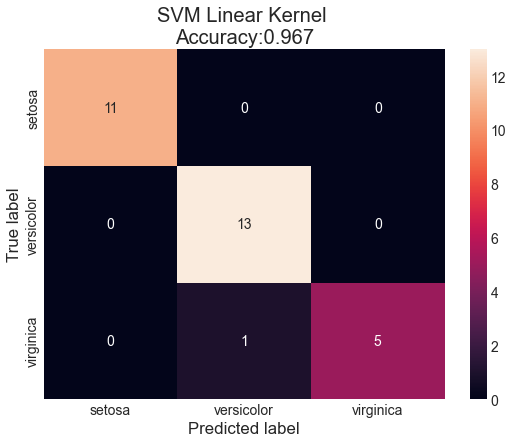

In [324]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Thank you...!!!